In [2]:
import nltk

In [3]:
#stop_words = [This,is,an,or,are,and,...]

In [4]:
nltk.download("stopwords")

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Anil\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [4]:
nltk.download("wordnet")

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Anil\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [5]:
#Stemming and lematization
#words,word,.. ===word
#tasty,tastful,..=== tast

In [2]:
import pandas as pd
data = pd.read_csv(r"C:\Users\SAGAR\Documents\ashwini\latest_project\avishkar\twesster\tweets_train.csv")


In [9]:
data.tweet[1]

"@user @user thanks for #lyft credit i can't use cause they don't offer wheelchair vans in pdx.    #disapointed #getthanked"

In [4]:
data.label.value_counts()

0    29720
1     2242
Name: label, dtype: int64

In [8]:
data.head()

,id,label,tweet
0,1,0,@user when a father is dysfunctional and is s...
1,2,0,@user @user thanks for #lyft credit i can't us...
2,3,0,bihday your majesty
3,4,0,#model i love u take with u all the time in ...
4,5,0,factsguide: society now #motivation


In [10]:
data.tweet[10]

' â\x86\x9d #ireland consumer price index (mom) climbed from previous 0.2% to 0.5% in may   #blog #silver #gold #forex'

In [11]:
#Removing stopwords on train file
from nltk.corpus import stopwords
stop=stopwords.words("english")

In [12]:
stop

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [12]:
#train_df X = Input and  y= Output
#test_df  X = Input Feature and (y = model has to predict)

In [13]:
import re

In [17]:
txt = data.tweet[10]
x = re.sub("#", " ", txt)
print(x)

 â  ireland consumer price index (mom) climbed from previous 0.2% to 0.5% in may    blog  silver  gold  forex


In [ ]:
#1  this pasta is delicious      positive
#2  this pasta is not delicious  negative  

In [18]:
import re
def clean_text(text):
    # specific
    text = re.sub(r"won't", "will not", text)
    text = re.sub(r"can\'t", "can not", text)
    # general
    text = re.sub(r"n\'t", " not", text)
    text = re.sub(r"\'re", " are", text)
    text = re.sub(r"\'s", " is", text)
    text = re.sub(r"\'d", " would", text)
    text = re.sub(r"\'ll", " will", text)
    text = re.sub(r"\'t", " not", text)
    text = re.sub(r"\'ve", " have", text)
    text = re.sub(r"\'m", " am", text)
    text = text.replace('\\r', ' ')
    text = text.replace('\\n', ' ')
    text = text.replace('\\"', ' ')
    #text = text.replace('!!!"', ' ')
    text = re.sub("(@[A-Za-z0-9]+)|([^A-Za-z0-9']+)|(\w+:\/\/\S+)", ' ', text)
    text = text.lower().strip()
    text = ' '.join(e for e in text.split() if e not in stop)
    return text

In [19]:
help(re.sub)

Help on function sub in module re:

sub(pattern, repl, string, count=0, flags=0)
    Return the string obtained by replacing the leftmost
    non-overlapping occurrences of the pattern in string by the
    replacement repl.  repl can be either a string or a callable;
    if a string, backslash escapes in it are processed.  If it is
    a callable, it's passed the match object and must return
    a replacement string to be used.



In [20]:
#Removing Hyperlinks and user ID on train file
data.tweet = data["tweet"].apply(clean_text)
data.head()

,id,label,tweet
0,1,0,user father dysfunctional selfish drags kids d...
1,2,0,user thanks lyft credit use cause offer wheelc...
2,3,0,bihday majesty
3,4,0,model love u take u time ur
4,5,0,factsguide society motivation


The goal of both stemming and lemmatization is to reduce inflectional forms and sometimes derivationally related forms of a word to a common base form. For instance:

am, are, is $\Rightarrow$ be

car, cars, car's, cars' $\Rightarrow$ car

In [21]:
#Applying Lemmatization
from nltk.stem.wordnet import WordNetLemmatizer
w = WordNetLemmatizer()
data.tweet=data.tweet.apply(lambda x:' '.join([w.lemmatize(word,'v') for word in x.split()])) # v stands for verb
data.head()

,id,label,tweet
0,1,0,user father dysfunctional selfish drag kid dys...
1,2,0,user thank lyft credit use cause offer wheelch...
2,3,0,bihday majesty
3,4,0,model love u take u time ur
4,5,0,factsguide society motivation


In [23]:
data.label.value_counts(normalize=True)

0    0.929854
1    0.070146
Name: label, dtype: float64

In [28]:
from sklearn.feature_extraction.text import CountVectorizer
vec = CountVectorizer()
vec.fit(data.tweet)

CountVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=1.0, max_features=None, min_df=1,
        ngram_range=(1, 1), preprocessor=None, stop_words=None,
        strip_accents=None, token_pattern='(?u)\\b\\w\\w+\\b',
        tokenizer=None, vocabulary=None)

In [29]:
vec.get_feature_names()

['00',
 '000',
 '000001',
 '001',
 '008',
 '0099',
 '00am',
 '00h30',
 '00pm',
 '01',
 '0115',
 '0161',
 '01926889917',
 '02',
 '0266808099',
 '03',
 '030916',
 '03111880779',
 '033',
 '0345',
 '039',
 '04',
 '0450',
 '04pm',
 '05',
 '0506823156',
 '05pm',
 '06',
 '0606',
 '0608',
 '0609',
 '0610',
 '061016ev',
 '0612',
 '0613',
 '0616',
 '0617',
 '0618',
 '0619',
 '0620',
 '0622',
 '064',
 '07',
 '07788427999',
 '08',
 '0830',
 '09',
 '09053111156',
 '095m',
 '0k',
 '0shares',
 '0tolerancemovie',
 '10',
 '100',
 '1000',
 '10003',
 '10007',
 '1000gifts',
 '1000th',
 '1000x',
 '1001',
 '10014',
 '10021',
 '10025',
 '10040',
 '100d',
 '100daysofcode',
 '100daysofpigpaintings',
 '100daysoftea',
 '100faces',
 '100happydays',
 '100happysongs',
 '100k',
 '100ml',
 '101',
 '1014',
 '101dalmatians',
 '101daysofsmiles',
 '1024x589',
 '10353',
 '104',
 '105',
 '105kg',
 '106',
 '107',
 '1070',
 '1080',
 '109',
 '10a',
 '10am',
 '10days',
 '10hrs',
 '10k',
 '10kday',
 '10kms',
 '10m',
 '10meses',

In [31]:
vec_tweet = vec.transform(data.tweet)

In [32]:
X = vec_tweet
y = data.label

In [33]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(X,y,test_size=0.2)

In [34]:
x_train.shape

(25569, 35806)

In [35]:
x_test.shape

(6393, 35806)

In [37]:
from sklearn.naive_bayes import BernoulliNB
bnb = BernoulliNB()
bnb.fit(x_train,y_train)

BernoulliNB(alpha=1.0, binarize=0.0, class_prior=None, fit_prior=True)

In [39]:
y_pred = bnb.predict(x_test)

In [40]:
pd.DataFrame({"Actual":y_test,"Predicted":y_pred})

,Actual,Predicted
31447,0,0
25239,0,0
13588,0,0
31006,0,0
6358,0,0
16126,0,0
30787,0,0
17228,0,0
2777,0,0
4424,0,0


In [43]:
from sklearn.metrics import accuracy_score
accuracy_score(y_pred,y_test)

0.9455654622243078

In [ ]:
#Undersampling / oversampling / SMOTE

Resampling Technique
A widely adopted technique for dealing with highly unbalanced datasets is called resampling. It consists of removing samples from the majority class (under-sampling) and/or adding more examples from the minority class (over-sampling).
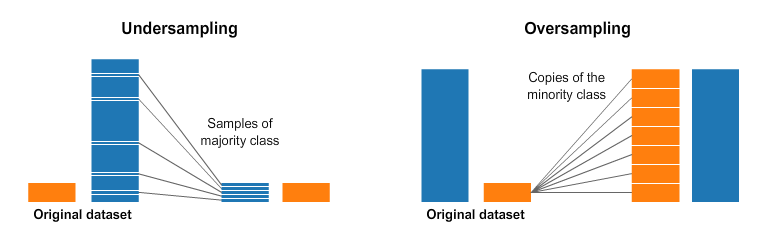

Class Imbalance: Undersampling and Oversampling

### Synthetic Minority Oversampling Technique

This technique generates synthetic data for the minority class.

SMOTE (Synthetic Minority Oversampling Technique) works by randomly picking a point from the minority class and computing the k-nearest neighbors for this point. The synthetic points are added between the chosen point and its neighbors.
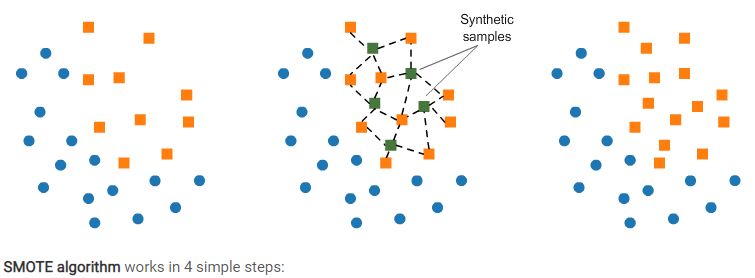

1. Choose a minority class as the input vector
2. Find its k nearest neighbors (k_neighbors is specified as an argument in the SMOTE() function)
3. Choose one of these neighbors and place a synthetic point anywhere on the line joining the point under consideration and its chosen neighbor
4. Repeat the steps until data is balanced

In [18]:
X = data.tweet
y = data.label

In [19]:
X.head(2)

0    user father dysfunctional selfish drag kid dys...
1    user thank lyft credit use cause offer wheelch...
Name: tweet, dtype: object

In [21]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(X,y,test_size=0.2)
print(x_train.shape,x_test.shape)

(25569,) (6393,)


In [22]:
from sklearn.feature_extraction.text import TfidfVectorizer
vector = TfidfVectorizer()
tfidf_train = vector.fit_transform(x_train)
tfidf_test = vector.transform(x_test)
print(tfidf_train.shape)
print(tfidf_test.shape)

(25569, 31019)
(6393, 31019)


In [23]:
features = vector.get_feature_names()

In [24]:
#Importing Smote
from imblearn.combine import SMOTETomek
s = SMOTETomek(random_state=42)
s_xtrain,s_ytrain = s.fit_sample(tfidf_train,y_train)

In [25]:
print(s_xtrain.shape)
print(s_ytrain.shape)

(47530, 31019)
(47530,)


In [27]:
s_ytrain.value_counts()

1    23765
0    23765
Name: label, dtype: int64

In [28]:
s_xtest,s_ytest = s.fit_sample(tfidf_test,y_test)

In [29]:
print(s_xtest.shape)
print(s_ytest.shape)

(11910, 31019)
(11910,)


In [30]:
s_ytest.value_counts()

1    5955
0    5955
Name: label, dtype: int64

In [31]:
from sklearn.tree import DecisionTreeClassifier
dtree = DecisionTreeClassifier()
dtree.fit(s_xtrain,s_ytrain)

DecisionTreeClassifier()

In [32]:
y_pred = dtree.predict(s_xtest)

In [33]:
pd.DataFrame({"Actual":s_ytest,"Predicted":y_pred})

,Actual,Predicted
0,0,0
1,1,1
2,0,0
3,0,0
4,0,0
5,0,0
6,0,0
7,0,0
8,0,0
9,0,0


In [34]:
from sklearn.metrics import accuracy_score
accuracy_score(y_pred,s_ytest)

0.8873215785054576